In [1011]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1012]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix
)
from sklearn.model_selection import train_test_split, GridSearchCV

### Description
**In this project, we aim to build a supervised machine learning model that predicts a football player's position (Goalkeeper, Defender, Midfielder, or Attacker) based on their performance statistics from the FIFA World Cup 2022. The dataset includes features such as appearances, goals, assists, dribbles, tackles, interceptions, clean sheets, and more. The task is a multi-class classification problem,and we will apply various preprocessing steps, feature selection, and classification models (e.g., Logistic Regression, Random Forest, kNN) to achieve the best accuracy.**

In [1013]:
df = pd.read_csv('fifa_wc_2022_stats.csv')

In [1014]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nationality                  814 non-null    object 
 1   FIFA Ranking                 814 non-null    int64  
 2   National Team Kit Sponsor    813 non-null    object 
 3   Position                     814 non-null    object 
 4   National Team Jersey Number  813 non-null    float64
 5   Player DOB                   814 non-null    object 
 6   Club                         814 non-null    object 
 7   Player Name                  814 non-null    object 
 8    Appearances                 814 non-null    object 
 9   Goals Scored                 813 non-null    object 
 10  Assists Provided             813 non-null    object 
 11  Dribbles per 90              813 non-null    object 
 12  Interceptions per 90         813 non-null    object 
 13  Tackles per 90      

In [1015]:
model_stats = {}

In [1016]:
df.sample(20)

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
744,Ghana,58,Puma,DF,23.0,"Aug 9, 1994",Strasbourg,Alexander Djiku,2,0,0,0.00,0.93,0.93,6.50,-,-,Nike
348,South Korea,25,Nike,MF,22.0,"June 30, 1994",Gimcheon Sangmu,Kwon Chang-hoon,1,0,0,N.A,N.A,N.A,N.A,-,-,Nike
626,Germany,14,Adidas,MF,21.0,"Oct 24, 1990",Manchester City,Ilkay Gundogan,3,1,0,0.94,0.47,1.41,6.10,-,-,Adidas
510,Mexico,15,Adidas,GK,13.0,"Jul 13, 1985",America,Guillermo Ochoa,3,-,-,-,-,-,-,50%,33%,Nike
456,Qatar,60,Nike,FW,9.0,"Dec 20, 1993",Al-Duhail,Mohammed Muntari,N.A,N.A,N.A,N.A,N.A,N.A,N.A,-,-,Nike
219,Australia,27,Nike,MF,22.0,"Mar 7, 1993",St Pauli,Jackson Irvine,4,0,0,0.51,0.51,1.01,6.08,-,-,Adidas
445,Qatar,60,Nike,MF,12.0,"Sep 16, 1990",Al-Duhail,Karim Boudiaf,3,0,0,1.95,0.00,0.97,8.76,-,-,Adidas
686,Belgium,4,Adidas,FW,24.0,"Feb 16, 2000",Lens,Lois Openda,1,0,0,1.00,0.00,7.50,N.A,-,-,Adidas
36,France,3,Nike,DF,24.0,"May 25, 1999",Liverpool,Ibrahima Konate,5,0,0,0.00,2.16,4.62,8.94,-,-,Nike
229,Australia,27,Nike,FW,23.0,"Dec 16, 1991",Adelaide United,Craig Goodwin,4,1,0,0.00,0.00,1.52,3.04,-,-,Nike


In [1017]:
df.columns

Index(['Nationality ', 'FIFA Ranking ', 'National Team Kit Sponsor',
       'Position', 'National Team Jersey Number', 'Player DOB', 'Club ',
       'Player Name ', ' Appearances', 'Goals Scored ', 'Assists Provided ',
       'Dribbles per 90', 'Interceptions per 90', 'Tackles per 90',
       'Total Duels Won per 90', 'Save Percentage', 'Clean Sheets',
       'Brand Sponsor/Brand Used'],
      dtype='object')

In [1018]:
df.columns = [col.strip() for col in df.columns]

In [1019]:
all_cols = list(df.columns)

In [1020]:
all_cols

['Nationality',
 'FIFA Ranking',
 'National Team Kit Sponsor',
 'Position',
 'National Team Jersey Number',
 'Player DOB',
 'Club',
 'Player Name',
 'Appearances',
 'Goals Scored',
 'Assists Provided',
 'Dribbles per 90',
 'Interceptions per 90',
 'Tackles per 90',
 'Total Duels Won per 90',
 'Save Percentage',
 'Clean Sheets',
 'Brand Sponsor/Brand Used']

In [1021]:
df.isnull().sum()

Nationality                    0
FIFA Ranking                   0
National Team Kit Sponsor      1
Position                       0
National Team Jersey Number    1
Player DOB                     0
Club                           0
Player Name                    0
Appearances                    0
Goals Scored                   1
Assists Provided               1
Dribbles per 90                1
Interceptions per 90           1
Tackles per 90                 1
Total Duels Won per 90         1
Save Percentage                2
Clean Sheets                   0
Brand Sponsor/Brand Used       1
dtype: int64

### Because I had some null values, I manually searched on internet and filled them with the right data I found for the category

In [1022]:
df.loc[df['National Team Jersey Number'].isnull(), 'National Team Jersey Number'] = 15

In [1023]:
df.loc[df['National Team Kit Sponsor'].isnull(), 'National Team Kit Sponsor'] = 'Nike'

In [1024]:
df.loc[df['Goals Scored'].isnull(), 'Goals Scored'] = 0
df.loc[df['Assists Provided'].isnull(), 'Assists Provided'] = 0
df.loc[df['Dribbles per 90'].isnull(), 'Dribbles per 90'] = 0
df.loc[df['Interceptions per 90'].isnull(), 'Interceptions per 90'] = 0
df.loc[df['Tackles per 90'].isnull(), 'Tackles per 90'] = 0
df.loc[df['Total Duels Won per 90'].isnull(), 'Total Duels Won per 90'] = 0

In [1025]:
df.loc[df['Save Percentage'].isnull(),'Save Percentage'] = 0

In [1026]:
df.loc[df['Brand Sponsor/Brand Used'].isnull(),'Brand Sponsor/Brand Used'] = 'Adidas'

In [1027]:
#I am finding the data that has - or N.A or N,A
df.applymap(lambda x: str(x).lower()).applymap(lambda x: str(x) in ['N.A','N,A','-']).sum()

C:\Users\User\AppData\Local\Temp\ipykernel_2644\1619092022.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: str(x).lower()).applymap(lambda x: str(x) in ['N.A','N,A','-']).sum()


Nationality                      0
FIFA Ranking                     0
National Team Kit Sponsor        0
Position                         0
National Team Jersey Number      0
Player DOB                       0
Club                             2
Player Name                      0
Appearances                      7
Goals Scored                    81
Assists Provided                81
Dribbles per 90                 81
Interceptions per 90            81
Tackles per 90                  81
Total Duels Won per 90          77
Save Percentage                761
Clean Sheets                   763
Brand Sponsor/Brand Used         0
dtype: int64

In [1028]:
#Now I want to replace these values, so I have a fully cleaned dataset for working on it
df.replace({'-': 0, 'N.A': 0, 'N,A': 0}, inplace=True)

In [1029]:
df.applymap(lambda x: str(x).lower()).applymap(lambda x: str(x) in ['N.A','N,A','-']).sum()

C:\Users\User\AppData\Local\Temp\ipykernel_2644\3816664401.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: str(x).lower()).applymap(lambda x: str(x) in ['N.A','N,A','-']).sum()


Nationality                    0
FIFA Ranking                   0
National Team Kit Sponsor      0
Position                       0
National Team Jersey Number    0
Player DOB                     0
Club                           0
Player Name                    0
Appearances                    0
Goals Scored                   0
Assists Provided               0
Dribbles per 90                0
Interceptions per 90           0
Tackles per 90                 0
Total Duels Won per 90         0
Save Percentage                0
Clean Sheets                   0
Brand Sponsor/Brand Used       0
dtype: int64

## Now starting to see the analysis for the features I need for the analysis

In [1030]:
df = df.convert_dtypes()

In [1031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Nationality                  814 non-null    string
 1   FIFA Ranking                 814 non-null    Int64 
 2   National Team Kit Sponsor    814 non-null    string
 3   Position                     814 non-null    string
 4   National Team Jersey Number  814 non-null    Int64 
 5   Player DOB                   814 non-null    string
 6   Club                         814 non-null    object
 7   Player Name                  814 non-null    string
 8   Appearances                  814 non-null    object
 9   Goals Scored                 814 non-null    object
 10  Assists Provided             814 non-null    object
 11  Dribbles per 90              814 non-null    object
 12  Interceptions per 90         814 non-null    object
 13  Tackles per 90               814 no

In [1032]:
df.sample(10)

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
462,Iran,24,Majid,GK,24,"May 30, 1992",Esteghlal,Hossein Hosseini,2,0,0,0,0,0,0,50.00%,50%,Adidas
108,Netherlands,6,Nike,DF,4,"Jul 8, 1991",Liverpool,Virgil van Dijk,5,0,0,0.00,0.75,0.38,9.00,0,0,Nike
190,Portugal,9,Nike,DF,5,"December 22, 1993",Borussia Dortmund,Raphael Guerreiro,4,1,2,0.65,0.97,0.97,3.23,0,0,Adidas
655,Costa Rica,32,New Balance,MF,24,"May 1, 2002",Municipal Grecia,Roan Wilson,1,0,0,0.00,0.00,0.00,0.00,0,0,Adidas
225,Australia,27,Nike,FW,11,"Sep 15, 1995",Cadiz,Awer Mabil,2,0,0,4.09,4.09,0.00,0.00,0,0,Nike
496,Wales,28,Adidas,MF,22,"Jan 25, 1999",Huddersfield Town,Sorba Thomas,1,0,0,0.00,0.00,0.00,0.00,0,0,Nike
403,Switzerland,12,Puma,FW,9,"Feb 22, 1992",Galatasaray,Haris Seferovic,3,0,0,0.00,0.00,0.00,0.00,0,0,Puma
185,Portugal,9,Nike,DF,3,"February 26, 1983",Porto,Pepe,4,1,0,0.25,1.50,1.25,7.25,0,0,Adidas
562,Denmark,18,Hummel,GK,22,"Aug 4, 1992",Union Berlin,Frederik Ronnow,0,0,0,0,0,0,0,0,0,Adidas
355,South Korea,25,Nike,FW,16,"August 28, 1992",Olympiacos,Hwang Ui-jo,4,0,0,0.86,0.00,0.00,2.57,0,0,Adidas


In [1033]:
df.sample(1)

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
613,Germany,14,Adidas,GK,22,"Apr 30, 1992",Barcelona,Marc-Andre ter Stegen,0,0,0,0,0,0,0,0,0,Adidas


In [1034]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Nationality                  814 non-null    string
 1   FIFA Ranking                 814 non-null    Int64 
 2   National Team Kit Sponsor    814 non-null    string
 3   Position                     814 non-null    string
 4   National Team Jersey Number  814 non-null    Int64 
 5   Player DOB                   814 non-null    string
 6   Club                         814 non-null    object
 7   Player Name                  814 non-null    string
 8   Appearances                  814 non-null    object
 9   Goals Scored                 814 non-null    object
 10  Assists Provided             814 non-null    object
 11  Dribbles per 90              814 non-null    object
 12  Interceptions per 90         814 non-null    object
 13  Tackles per 90               814 no

In [1035]:
df['Nationality'].value_counts()

Nationality
Argentina       26
Ecuador         26
Poland          26
Morocco         26
South Korea     26
Croatia         26
Brazil          26
Netherlands     26
Australia       26
Canada          26
Portugal        26
Spain           26
Mexico          26
Denmark         26
Tunisia         26
Germany         26
Ghana           26
Uruguay         26
Qatar           26
England         25
Wales           25
Belgium         25
Costa Rica      25
Switzerland     25
USA             25
France          25
Iran            25
Serbia          24
Senegal         24
Cameroon        24
Japan           24
Saudi Arabia    24
Name: count, dtype: Int64

In [1036]:
#I want to keep the name, so I can write it for the end prediction as a better visuality
player_names = df['Player Name']
features_to_drop = [
    'National Team Kit Sponsor',        # not predictive
    'Player DOB',                       # unused unless extracting age
    'Club',                             # not informative
    'Player Name',                      # just an identifier
    'Nationality',                      # not informative
    'Brand Sponsor/Brand Used',         # irrelevant
    'FIFA Ranking',                     # irrelevant
    'National Team Jersey Number'       # irrelevant
]

df.drop(columns=features_to_drop, inplace=True)

In [1037]:
df.head(10)

,Position,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets
0,GK,7,0,0,0.00,0.00,0.00,0.65,46.67%,43%
1,GK,0,0,0,0,0,0,0,0,0
2,GK,0,0,0,0,0,0,0,0,0
3,DF,7,0,1,0.33,1.17,1.30,7.17,0,0
4,DF,6,0,0,1.45,0.48,2.90,7.97,0,0
5,DF,6,0,0,0.48,2.17,1.69,5.07,0,0
6,DF,3,0,0,0.00,0.00,0.00,3.16,0,0
7,DF,7,1,1,0.32,0.47,1.42,1.58,0,0
8,DF,4,0,0,0.77,0.77,2.31,5.39,0,0
9,DF,1,0,0,0,0.00,0.00,0,0,0


In [1038]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Position                814 non-null    string
 1   Appearances             814 non-null    object
 2   Goals Scored            814 non-null    object
 3   Assists Provided        814 non-null    object
 4   Dribbles per 90         814 non-null    object
 5   Interceptions per 90    814 non-null    object
 6   Tackles per 90          814 non-null    object
 7   Total Duels Won per 90  814 non-null    object
 8   Save Percentage         814 non-null    object
 9   Clean Sheets            814 non-null    object
dtypes: object(9), string(1)
memory usage: 63.7+ KB


In [1039]:
df['Save Percentage'] = df['Save Percentage'].str.replace('%', '', regex=False)
df['Clean Sheets'] = df['Clean Sheets'].str.replace('%', '', regex=False)
df.replace(['-', ''], pd.NA, inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.fillna(0, inplace=True)

In [1040]:
df.sample(10)

,Position,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets
660,FW,3,0,0,3.00,0.00,3.00,12.00,0.0,0.0
561,GK,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0
762,GK,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0
262,DF,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0
162,DF,4,0,0,0.00,0.77,1.55,4.38,0.0,0.0
343,MF,4,0,0,0.00,0.59,1.48,5.04,0.0,0.0
686,FW,1,0,0,1.00,0.00,7.50,0.00,0.0,0.0
804,MF,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0
226,FW,3,0,0,0.00,1.70,0.00,3.40,0.0,0.0
517,DF,2,0,0,2.56,1.02,0.51,4.70,0.0,0.0


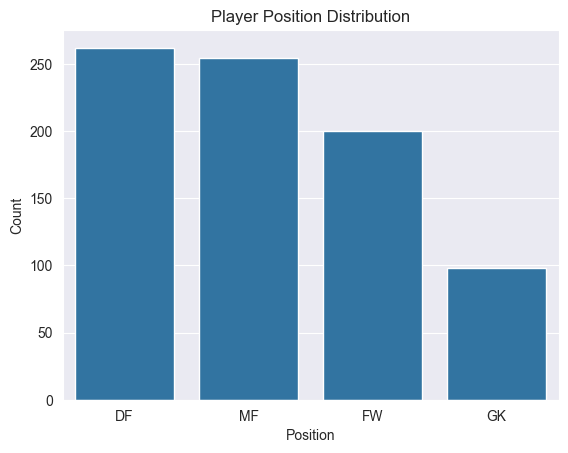

In [1041]:
#Class distribution
sns.countplot(x='Position', data=df, order=df['Position'].value_counts().index)
plt.title("Player Position Distribution")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

When it comes to class distribution, in football it is normal for the goalkeeper position to be like that, because there is always 1 main goalkeeper and 2 - 3 reserves for him for the tournament if the plan does not go as planned
Then we see that the defending position is having the most players. That is because there is always so many defenders, and they contain the central backs, and the full backs too.
The midfield is the position with second most players and the forward is on the third place.
**So from my football knowledge I can see that this is perfectly balanced.**

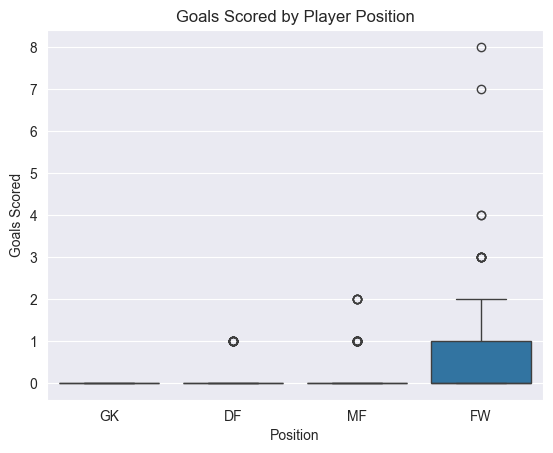

In [1042]:
sns.boxplot(x='Position', y='Goals Scored', data=df)
plt.title("Goals Scored by Player Position")
plt.show()


When we see the Goals scored by position, we can see that the forwards are the ones who are scoring the most goals of all positions

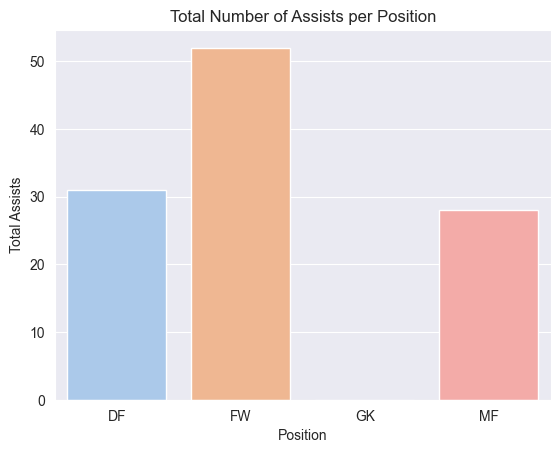

In [1043]:
assist_sum = df.groupby('Position')['Assists Provided'].sum().reset_index()
sns.barplot(data=assist_sum, x='Position', y='Assists Provided', hue='Position', palette='pastel', legend=False)
plt.title("Total Number of Assists per Position")
plt.ylabel("Total Assists")
plt.xlabel("Position")
plt.show()

So as we can see, from the data, the assists and the goals are provided mostly by the attackers, so if a player has some goals and assists, will be provided as attacker or midfielder.


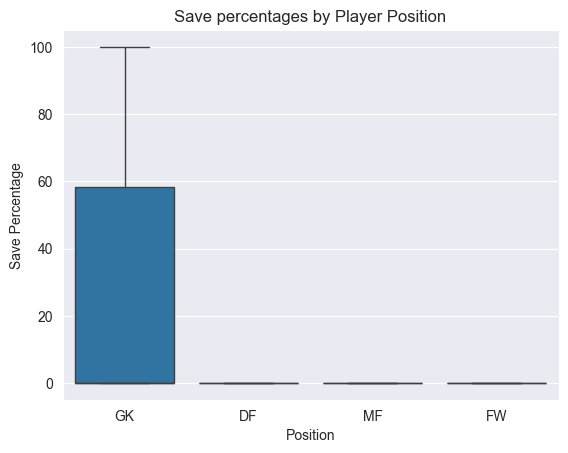

In [1044]:
sns.boxplot(x='Position', y='Save Percentage', data=df)
plt.title("Save percentages by Player Position")
plt.show()

This statistic 'The save percentage' is char. for the goalkeepers, because they are the ones who make the saves.

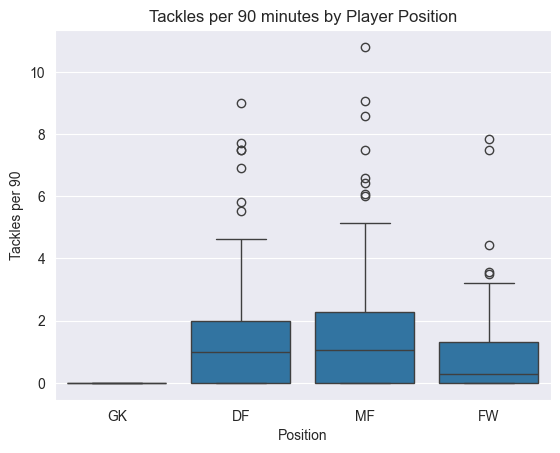

In [1045]:
sns.boxplot(x='Position', y='Tackles per 90', data=df)
plt.title("Tackles per 90 minutes by Player Position")
plt.show()

Here we see that the most tackles are made from the midfield and the defenders, which is normal and the least from the goalkeepers which is normal too. Their job is to save the ball not to go in the net, as the last chance before scoring a goal.

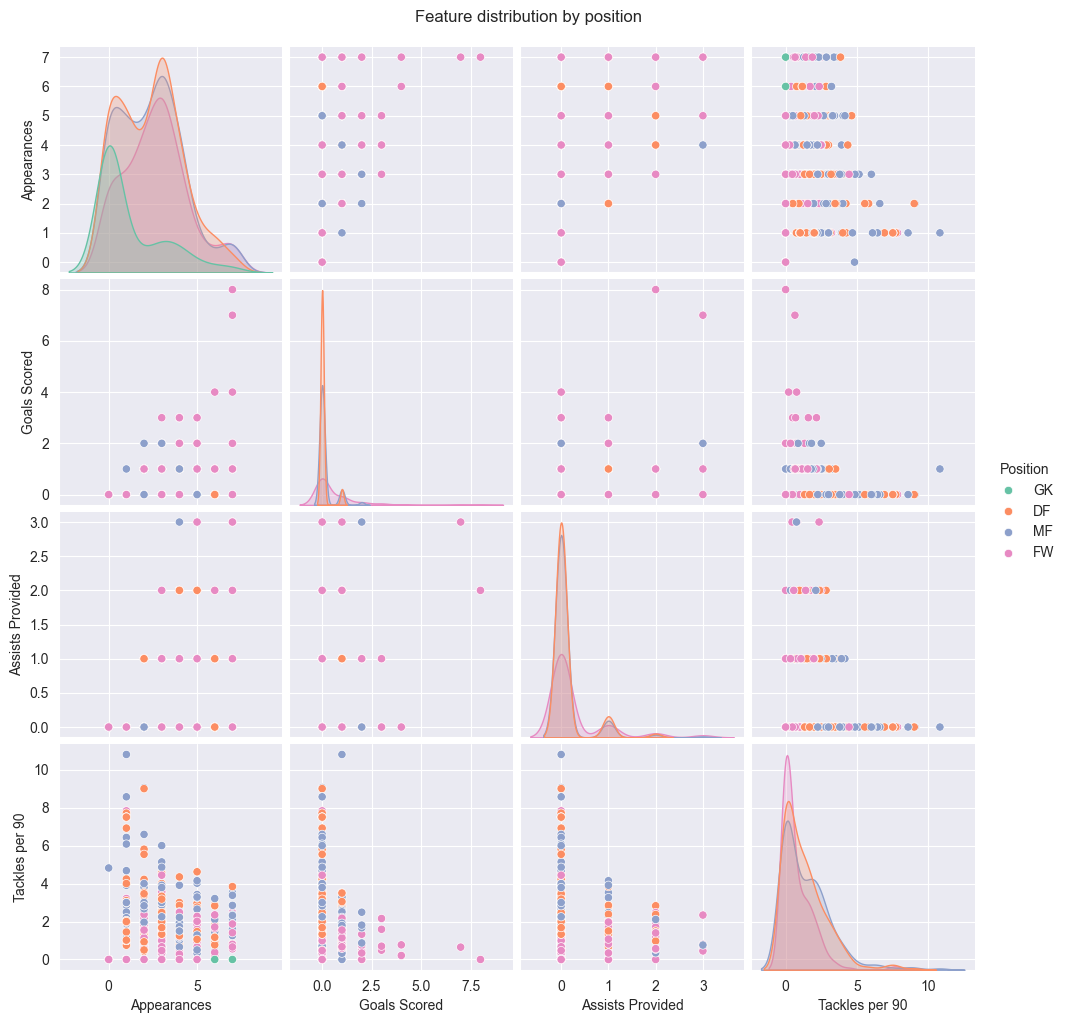

In [1046]:
sns.pairplot(df, vars=['Appearances', 'Goals Scored', 'Assists Provided', 'Tackles per 90'],
             hue='Position', palette='Set2')
plt.suptitle("Feature distribution by position", y=1.02)
plt.show()


Text(0.5, 1.0, 'Normalized Goals Scored per Position')

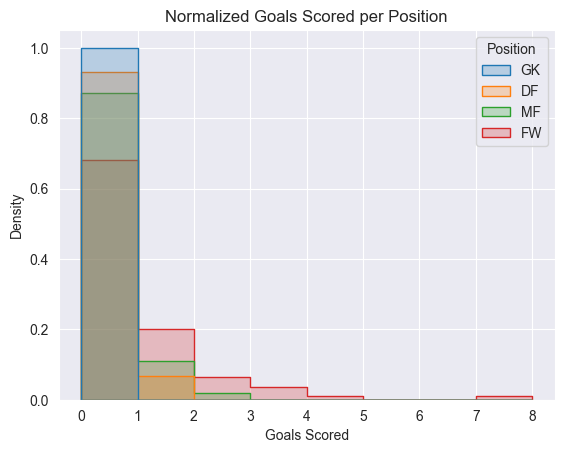

In [1047]:
sns.histplot(data=df, x='Goals Scored', hue='Position', element='step', stat='density', common_norm=False, bins=8)
plt.title("Normalized Goals Scored per Position")

Text(0.5, 1.0, 'Normalized Assists Provided per Position')

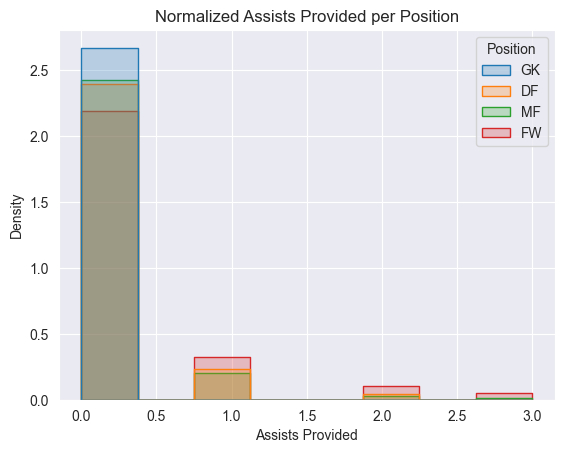

In [1048]:
sns.histplot(data=df, x='Assists Provided', hue='Position', element='step', stat='density', common_norm=False, bins=8)
plt.title("Normalized Assists Provided per Position")

Text(0.5, 1.0, 'Normalized Tackles per 90 minutes, per Position')

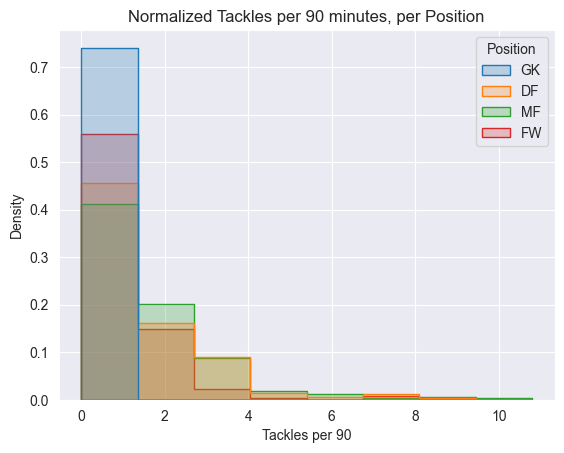

In [1049]:
sns.histplot(data=df, x='Tackles per 90', hue='Position', element='step', stat='density', common_norm=False, bins=8)
plt.title("Normalized Tackles per 90 minutes, per Position")

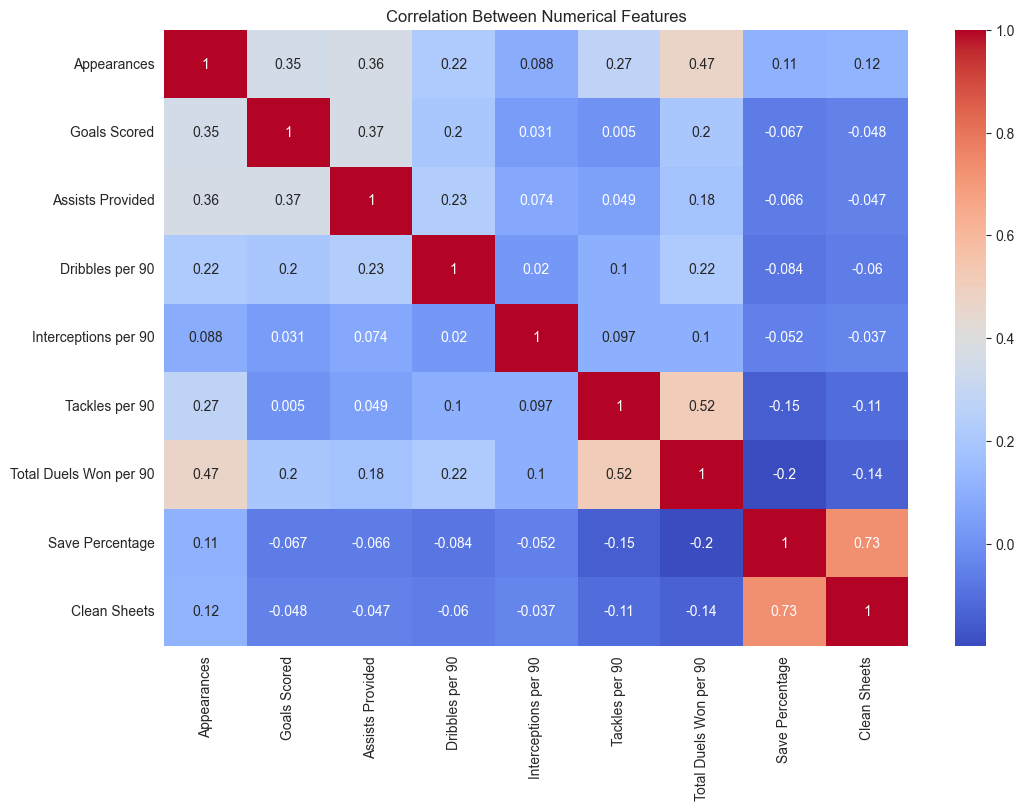

In [1050]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Position']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

In [1051]:
#I want to create another feature, goal_contribution 
df['Goal Contribution per 90'] = (
    (df['Goals Scored'] + df['Assists Provided']) / df['Appearances'].replace(0, 1)
)

<Axes: xlabel='Appearances', ylabel='Goal Contribution per 90'>

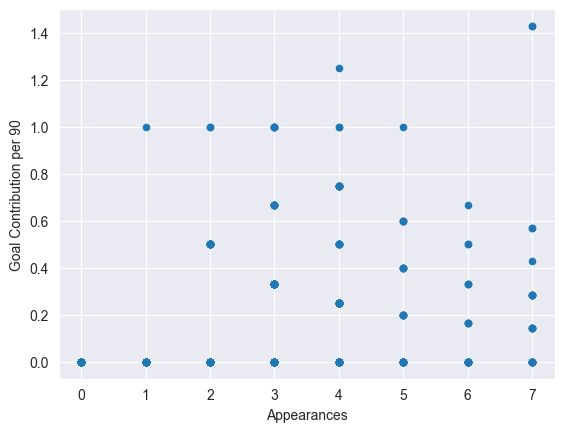

In [1052]:
df.plot(x='Appearances', y='Goal Contribution per 90', kind='scatter')

In [1053]:
df = df[[col for col in df.columns if col != 'Position'] + ['Position']]

In [1054]:
print(df.dtypes)

Appearances                          int64
Goals Scored                         int64
Assists Provided                     int64
Dribbles per 90                    float64
Interceptions per 90               float64
Tackles per 90                     float64
Total Duels Won per 90             float64
Save Percentage                    float64
Clean Sheets                       float64
Goal Contribution per 90           float64
Position                    string[python]
dtype: object


In [1055]:
df['Position'].value_counts()

Position
DF    262
MF    254
FW    200
GK     98
Name: count, dtype: Int64

In [1056]:
label_enc = LabelEncoder()
df['Position'] = label_enc.fit_transform(df['Position'])

In [1057]:
print(dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_))))

{'DF': 0, 'FW': 1, 'GK': 2, 'MF': 3}


In [1058]:
df.head(26)

,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Goal Contribution per 90,Position
0,7,0,0,0.00,0.00,0.00,0.65,46.67,43.0,0.000000,2
1,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,2
2,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,2
3,7,0,1,0.33,1.17,1.30,7.17,0.00,0.0,0.142857,0
4,6,0,0,1.45,0.48,2.90,7.97,0.00,0.0,0.000000,0
5,6,0,0,0.48,2.17,1.69,5.07,0.00,0.0,0.000000,0
6,3,0,0,0.00,0.00,0.00,3.16,0.00,0.0,0.000000,0
7,7,1,1,0.32,0.47,1.42,1.58,0.00,0.0,0.285714,0
8,4,0,0,0.77,0.77,2.31,5.39,0.00,0.0,0.000000,0
9,1,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0


In [1059]:
X = df.drop(columns=['Position'])
y = df['Position']

In [1060]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [1061]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Classifier

Random Forest - Grid Search Best Params:
{'max_depth': 12, 'min_samples_split': 5, 'n_estimators': 150}

Accuracy: 0.5500
Precision: 0.5813
Recall:    0.5521
F1 Score:  0.5457
Balanced:    0.6174

Classification Report:

              precision    recall  f1-score   support

          DF       0.63      0.56      0.59        52
          FW       0.57      0.50      0.53        40
          GK       0.43      1.00      0.60        20
          MF       0.60      0.41      0.49        51

    accuracy                           0.55       163
   macro avg       0.56      0.62      0.55       163
weighted avg       0.58      0.55      0.55       163


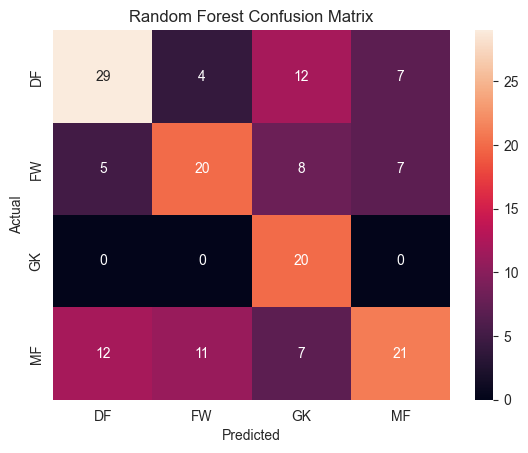

In [1062]:
parameter_grid = {
    'n_estimators': [50,150,200],
    'max_depth': [3, 5, 10, 12],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), parameter_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest - Grid Search Best Params:")
print(grid_search_rf.best_params_)

acc = round(accuracy_score(y_test, y_pred_rf),2)
print(f"\nAccuracy: {acc:.4f}")
model_stats['RandomForestClassifier'] = acc
# Other metrics
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred_rf)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Balanced:    {balanced_acc:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=label_enc.classes_))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


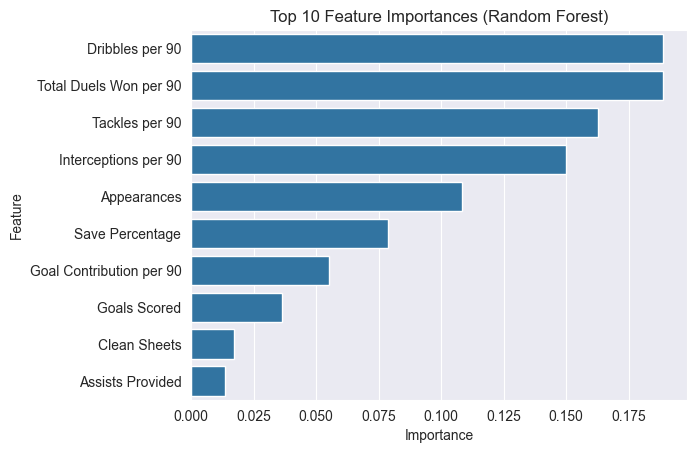

In [1063]:
importances = best_rf.feature_importances_
feature_names = X.columns

import pandas as pd
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=imp_df.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


## Logistic Regression

 Logistic Regression Accuracy:      0.5300
 Precision :              0.5620
 Recall:                 0.5337
 F1 Score:               0.5257
Classification report
              precision    recall  f1-score   support

          DF       0.55      0.54      0.54        52
          FW       0.66      0.47      0.55        40
          GK       0.43      1.00      0.60        20
          MF       0.56      0.39      0.46        51

    accuracy                           0.53       163
   macro avg       0.55      0.60      0.54       163
weighted avg       0.56      0.53      0.53       163

Heatmap


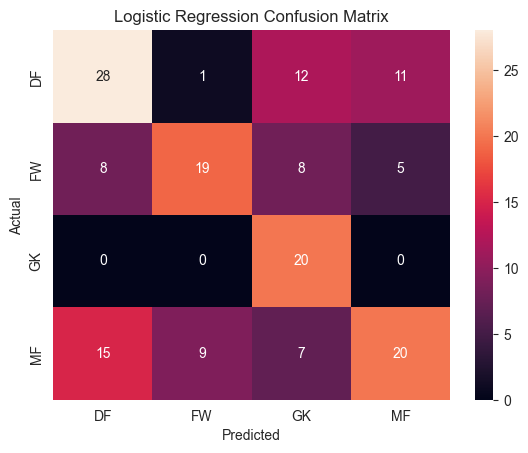

In [1064]:
lr = LogisticRegression(max_iter=500,C=1.0, solver='lbfgs',penalty='l2',random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

acc = round(accuracy_score(y_test, y_pred_lr),2)
model_stats['LogisticRegression'] = acc
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred_lr)

print(f" Logistic Regression Accuracy:      {acc:.4f}")
print(f" Precision :              {precision:.4f}")
print(f" Recall:                 {recall:.4f}")
print(f" F1 Score:               {f1:.4f}")
print("Classification report")
print(classification_report(y_test, y_pred_lr, target_names=label_enc.classes_))
print("Heatmap")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Decision Tree Classifier

Decision Tree - Best Params:
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.4724
Precision (weighted): 0.4792
Recall (weighted):    0.4724
F1 Score (weighted):  0.4535
Balanced Accuracy:    0.5570

Classification Report:
              precision    recall  f1-score   support

          DF       0.58      0.42      0.49        52
          FW       0.50      0.55      0.52        40
          GK       0.43      1.00      0.60        20
          MF       0.38      0.25      0.31        51

    accuracy                           0.47       163
   macro avg       0.47      0.56      0.48       163
weighted avg       0.48      0.47      0.45       163


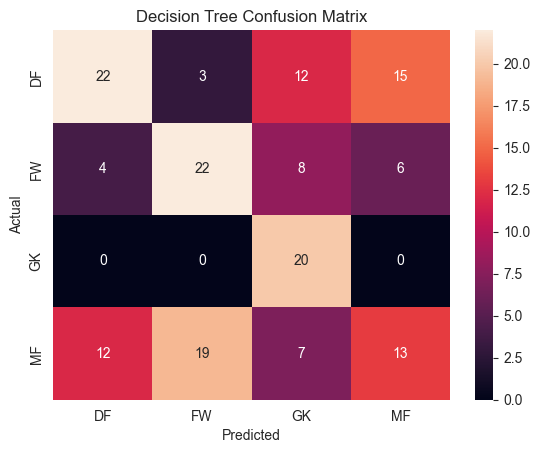

In [1065]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, classification_report, confusion_matrix

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Decision Tree - Best Params:")
print(grid_search_dt.best_params_)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
model_stats['DecisionTreeClassifier'] = round(accuracy_score(y_test, y_pred_dt),2)
print(f"Precision (weighted): {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Recall (weighted):    {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"F1 Score (weighted):  {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Balanced Accuracy:    {balanced_accuracy_score(y_test, y_pred_dt):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=label_enc.classes_))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


## LDA

LDA Accuracy: 0.497
              precision    recall  f1-score   support

          DF       0.56      0.52      0.54        52
          FW       0.65      0.42      0.52        40
          GK       1.00      0.45      0.62        20
          MF       0.35      0.55      0.43        51

    accuracy                           0.50       163
   macro avg       0.64      0.49      0.53       163
weighted avg       0.57      0.50      0.51       163


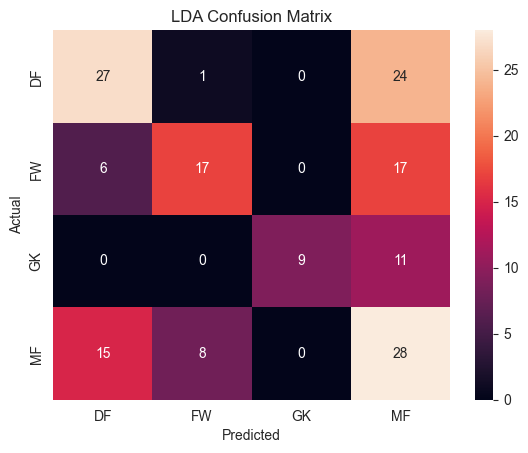

In [1066]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print(f"LDA Accuracy: {round(accuracy_score(y_test, y_pred_lda),3)}")
model_stats['LDA'] = round(accuracy_score(y_test, y_pred_lda),2)
print(classification_report(y_test, y_pred_lda, target_names=label_enc.classes_))

sns.heatmap(confusion_matrix(y_test, y_pred_lda), annot=True, fmt='d',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LDA Confusion Matrix")
plt.show()


## SVM

SVC Accuracy:0.48
              precision    recall  f1-score   support

          DF       0.55      0.60      0.57        52
          FW       0.77      0.25      0.38        40
          GK       0.82      0.45      0.58        20
          MF       0.34      0.55      0.42        51

    accuracy                           0.48       163
   macro avg       0.62      0.46      0.49       163
weighted avg       0.57      0.48      0.48       163


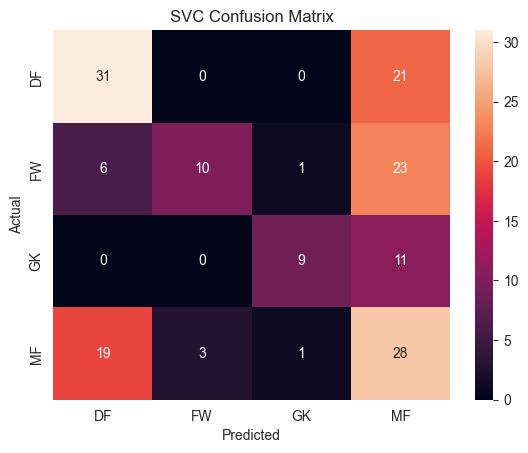

In [1067]:
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print(f"SVC Accuracy:{round(accuracy_score(y_test, y_pred_svc),2)}")
print(classification_report(y_test, y_pred_svc, target_names=label_enc.classes_))
model_stats['SVM'] = round(accuracy_score(y_test, y_pred_svc),2)
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVC Confusion Matrix")
plt.show()


## Naive Bayes Classifier

Naive Bayes Accuracy: 0.44
              precision    recall  f1-score   support

          DF       0.50      0.58      0.54        52
          FW       0.52      0.30      0.38        40
          GK       0.35      1.00      0.52        20
          MF       0.43      0.20      0.27        51

    accuracy                           0.44       163
   macro avg       0.45      0.52      0.43       163
weighted avg       0.47      0.44      0.41       163


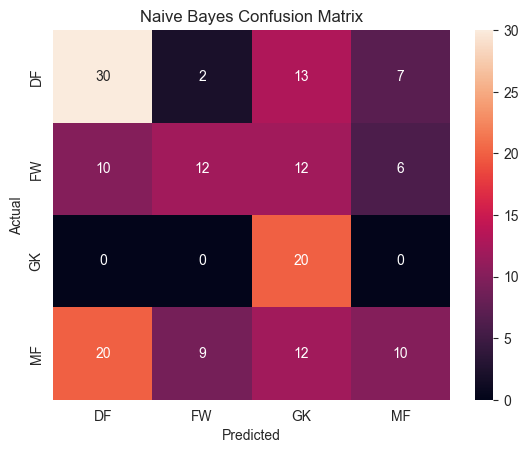

In [1068]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(f"Naive Bayes Accuracy: {round(accuracy_score(y_test, y_pred_nb),2)}")
print(classification_report(y_test, y_pred_nb, target_names=label_enc.classes_))
model_stats['NaiveBayesClassifier'] = round(accuracy_score(y_test, y_pred_nb),2)
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


## KNN

kNN - Best Params:
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.4724
              precision    recall  f1-score   support

          DF       0.49      0.48      0.49        52
          FW       0.37      0.62      0.47        40
          GK       1.00      0.45      0.62        20
          MF       0.50      0.35      0.41        51

    accuracy                           0.47       163
   macro avg       0.59      0.48      0.50       163
weighted avg       0.53      0.47      0.48       163


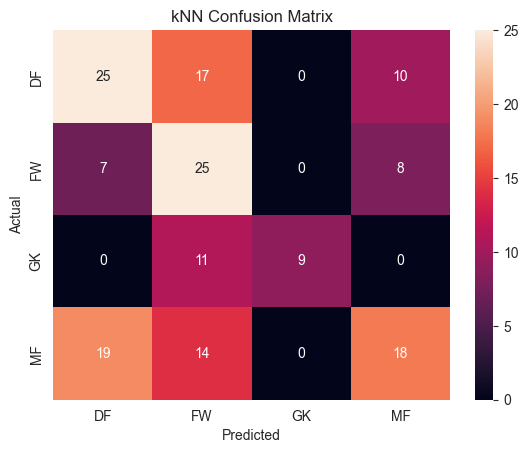

In [1069]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("kNN - Best Params:")
print(grid_search_knn.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn, target_names=label_enc.classes_))
model_stats['KNN'] = round(accuracy_score(y_test, y_pred_knn),2)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("kNN Confusion Matrix")
plt.show()


## XG BOOST

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:45:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5214723926380368
Precision (weighted): 0.5478
Recall (weighted):    0.5215
F1 Score (weighted):  0.5123
Balanced Accuracy:    0.5889

Classification Report:
              precision    recall  f1-score   support

          DF       0.56      0.54      0.55        52
          FW       0.65      0.42      0.52        40
          GK       0.43      1.00      0.60        20
          MF       0.50      0.39      0.44        51

    accuracy                           0.52       163
   macro avg       0.53      0.59      0.53       163
weighted avg       0.55      0.52      0.51       163


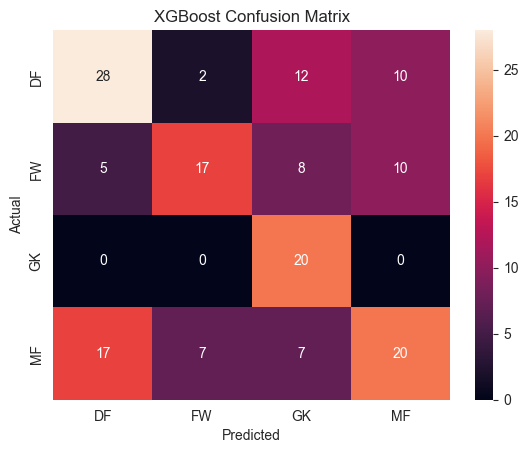

In [1070]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

xgb = XGBClassifier(use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(f"Precision (weighted): {precision_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"Recall (weighted):    {recall_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"F1 Score (weighted):  {f1_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"Balanced Accuracy:    {balanced_accuracy_score(y_test, y_pred_xgb):.4f}")
model_stats['XGBoost'] = round(accuracy_score(y_test, y_pred_xgb),2)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_enc.classes_))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


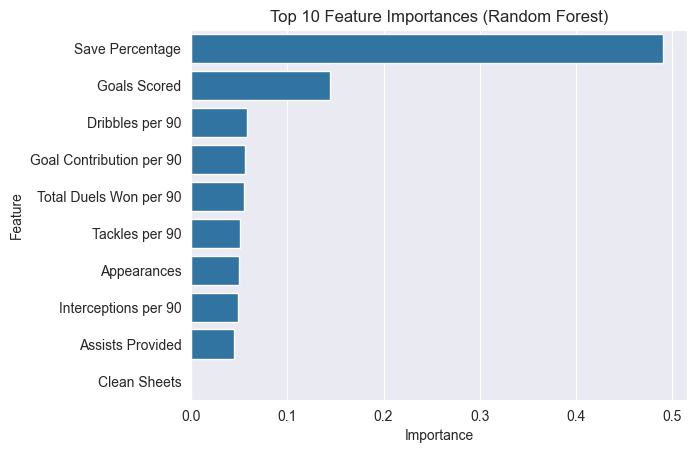

In [1071]:
importances = xgb.feature_importances_
feature_names = X.columns

import pandas as pd
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=imp_df.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


## NEURAL NETWORK

In [1072]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense, Dropout
from keras._tf_keras.keras.utils import to_categorical
from keras._tf_keras.keras import Input

In [1073]:
# One-hot encode target values
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
input_dim = X_train.shape[1]
output_dim = y_train_cat.shape[1]

In [1074]:
input_dim #I put 10 features

10

In [1075]:
output_dim #and I can get one of the 4 positions

4

In [1076]:
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(output_dim, activation='softmax')
])

In [1077]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=60, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2772 - loss: 1.8779 - val_accuracy: 0.3359 - val_loss: 1.5082
Epoch 2/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2869 - loss: 1.8148 - val_accuracy: 0.3053 - val_loss: 1.3670
Epoch 3/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2900 - loss: 1.5512 - val_accuracy: 0.3130 - val_loss: 1.3082
Epoch 4/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3256 - loss: 1.4301 - val_accuracy: 0.3664 - val_loss: 1.2784
Epoch 5/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3365 - loss: 1.5027 - val_accuracy: 0.3511 - val_loss: 1.2555
Epoch 6/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2999 - loss: 1.3746 - val_accuracy: 0.3511 - val_loss: 1.2387
Epoch 7/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3419 - loss: 1.3180 - val_accuracy: 0.3740 - val_loss: 1.2243
Epoch 8/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3857 - loss: 1.2326 - val_accuracy: 0.3893 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Neural Network Accuracy:0.45
              precision    recall  f1-score   support

          DF       0.45      0.69      0.55        52
          FW       0.62      0.45      0.52        40
          GK       1.00      0.45      0.62        20
          MF       0.24      0.22      0.23        51

    accuracy                           0.45       163
   macro avg       0.58      0.45      0.48       163
weighted avg       0.50      0.45      0.45       163


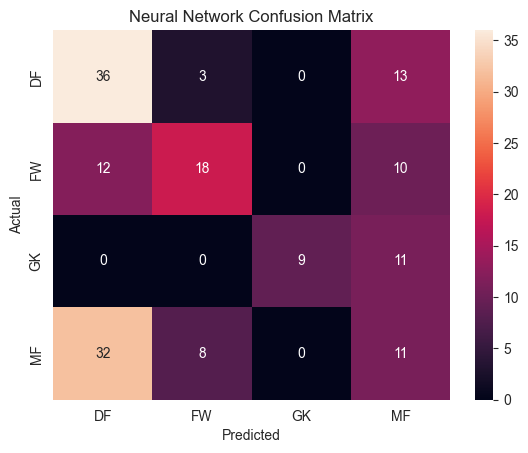

In [1078]:
y_pred_nn = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_nn, axis=1)

print(f"Neural Network Accuracy:{round(accuracy_score(y_test, y_pred_labels),2)}")
print(classification_report(y_test, y_pred_labels, target_names=label_enc.classes_))
model_stats['NeuralNetwork'] = round(accuracy_score(y_test, y_pred_labels),2)
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, fmt='d',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Neural Network Confusion Matrix")
plt.show()


## Representing all accuracies from all models

In [1079]:
sorted_models = sorted(model_stats.items(), key=lambda x: x[1], reverse=True)
model_df = pd.DataFrame(sorted_models, columns=['Model', 'Accuracy'])
model_df.index += 1 
print(model_df)

                    Model  Accuracy
1  RandomForestClassifier      0.55
2      LogisticRegression      0.53
3                 XGBoost      0.52
4                     LDA      0.50
5                     SVM      0.48
6  DecisionTreeClassifier      0.47
7                     KNN      0.47
8           NeuralNetwork      0.45
9    NaiveBayesClassifier      0.44


### My final thoughts:
I believe this dataset, while valuable, lacks the necessary depth in features to build highly accurate predictive models. Many of the players listed participated in the World Cup but did not actually play meaningful minutes, especially goalkeepers. This leads to sparse or zero-valued statistics, which confuse machine learning models and hinder their ability to learn meaningful patterns.
For this type of data classification, with multiple labels, there should be provided so many statistics that will make the model classify much better than now.
As a result, the model struggles to correctly distinguish between player roles like midfielders, defenders, attackers, and goalkeepers, based on limited or unrepresentative data. For this type of multi-class classification problem, a more detailed dataset would be required — one that includes advanced metrics such as heatmaps, touches, passes completed, average position, defensive/attacking zones covered, and so on.
**For projects and testing some models, the dataset is generally good, but if we want to create something more serious, this dataset is not near good, so we can make good 'Position' predictions.**

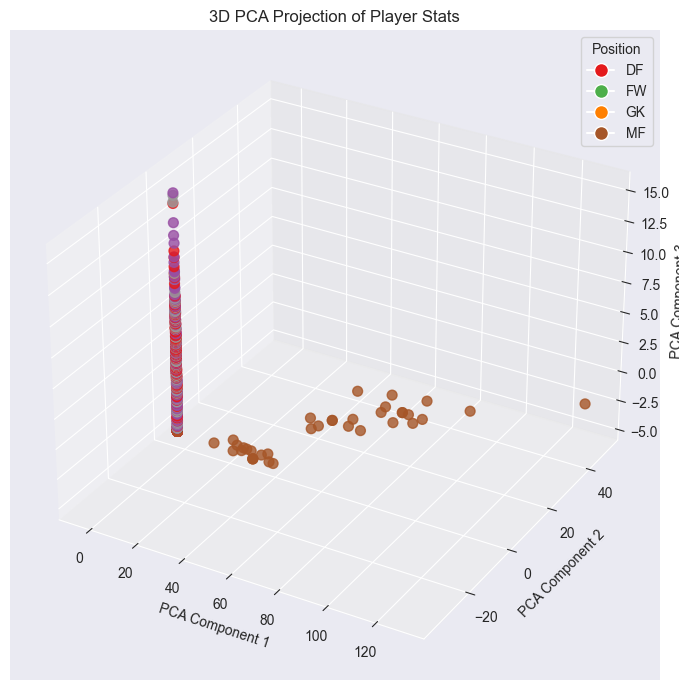

In [1080]:
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y, cmap='Set1', s=50, alpha=0.8
)

# Add legend manually
labels = label_enc.classes_
handles = [plt.Line2D([], [], marker='o', color='w', label=label,
                      markerfacecolor=plt.cm.Set1(i / len(labels)), markersize=10)
           for i, label in enumerate(labels)]
ax.legend(handles=handles, title='Position')

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Projection of Player Stats")

plt.tight_layout()
plt.show()


**PCA struggles to separate roles like GK, DF, MF, FW.**